In [28]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [8]:
data = pd.read_csv('cleaneddata.csv')
data['underweight'] = [1 if x < 17.85 else 0 for x in data['bmi']]
data['normal']= [1 if x >= 17.85 and x<=30.5 else 0 for x in data['bmi']]
data['overweight'] = [1 if x > 30.5 and x <= 37.5 else 0 for x in data['bmi']]
data['severlyoverweight'] = [1 if x > 37.5 and x <= 45.5 else 0 for x in data['bmi']]
data['ogre'] = [1 if x > 45.5 else 0 for x in data['bmi']]
data['nokid'] = [1 if x ==0 else 0 for x in data['children']]
data['onekid'] = [1 if x ==1 else 0 for x in data['children']]
data['twokid'] = [1 if x ==2 else 0 for x in data['children']]
data['threekid'] = [1 if x ==3 else 0 for x in data['children']]
data['fourkid'] = [1 if x ==4 else 0 for x in data['children']]
data['fivekid'] = [1 if x ==5 else 0 for x in data['children']]
data['elderfemale'] = [1 if x > 60.75 and x else 0 for x in data['age']]
data['middleagefemale'] = [1 if x <= 60.75 and x>47.5 else 0 for x in data['age']]
data['youngerfemale'] = [1 if x <= 46.5 and x>42.5 else 0 for x in data['age']]
data['youngfemale'] = [1 if x <= 38 and x>31 else 0 for x in data['age']]
data['teens']= [1 if x <=21.5 else 0 for x in data['age']]
data['test'] = [1 if x <= 31 and x>21.5 else 0 for x in data['age']]

In [9]:
X = data[['smoker','normal', 'is_east','is_north','underweight', 'overweight','severlyoverweight','ogre','nokid', 'onekid', 'twokid','fourkid', 'fivekid','test','elderfemale','middleagefemale', 'youngerfemale', 'youngfemale', 'teens', 'sex']]
y = data['charges']

In [10]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

regression = linear_model.Lasso(alpha=13.25, tol=0.08)

model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("root mean squared error: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

root mean squared error: 3086.159
Coefficient of determination: 0.9343


Text(0.5, 1.0, 'y_pred vs y_test')

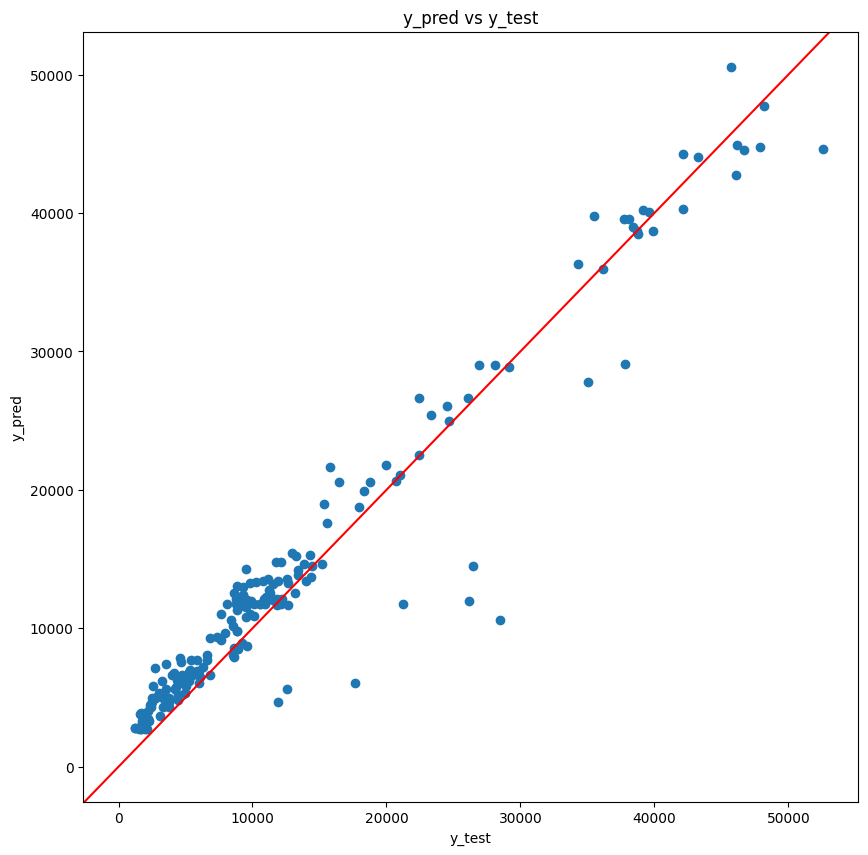

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)

plt.axline((0,0),slope=1, c=[1,0,0])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test')

In [43]:
print(X.columns)
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)
print(poly_variables)
print(model.coef_)
print(model.n_features_in_)

Index(['smoker', 'normal', 'is_east', 'is_north', 'underweight', 'overweight',
       'severlyoverweight', 'ogre', 'nokid', 'onekid', 'twokid', 'fourkid',
       'fivekid', 'test', 'elderfemale', 'middleagefemale', 'youngerfemale',
       'youngfemale', 'teens', 'sex'],
      dtype='object')
[[1. 1. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
[ 0.00000000e+00  2.29715061e+04 -3.88925735e+03  4.45795747e+01
  4.95245068e+02 -8.13842033e+02  7.09896094e+01  3.42322860e+02
 -0.00000000e+00 -1.21102843e+03 -1.75842986e+02 -0.00000000e+00
  4.48357094e+02  0.00000000e+00 -2.74667504e+03  6.58551954e+03
  4.96747047e+03  1.25795109e+03 -5.48433756e+02 -3.53929339e+03
 -7.26809300e+01  4.96800687e+02 -9.82013486e+03 -5.50606763e+02
  0.00000000e+00 -3.13043467e+03  7.99380153e+03  1.15941033e+04
  1.27270342e+04  1.36527359e+03  9.05018424e+02 -9.05221620e+02
 -0.00000000e+00 -0.00000000e+0

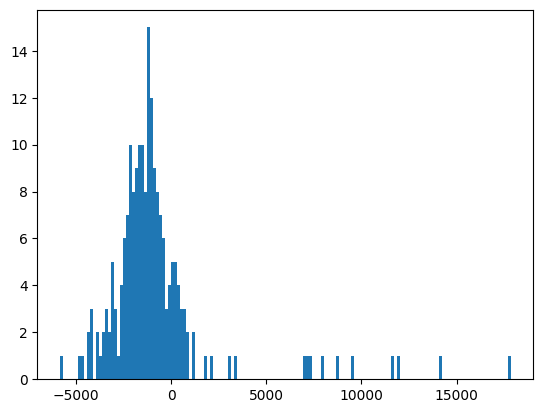

In [14]:
residuals = y_test - y_pred
plt.hist(residuals, bins=150)
plt.show()

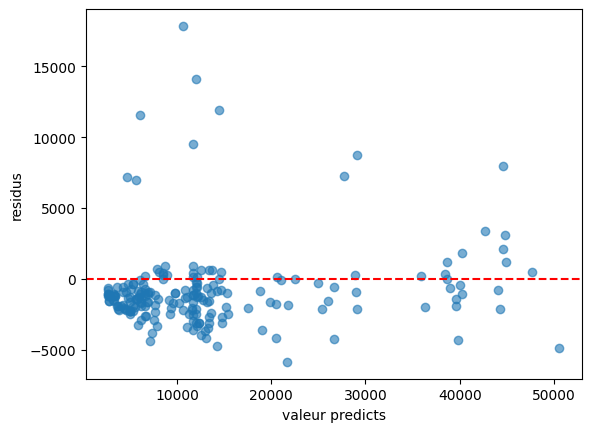

In [17]:
plt.scatter(y_pred, residuals, alpha=0.6)
plt.xlabel('valeur predicts')
plt.ylabel('residus')
plt.axhline(0, color='red', linestyle='--')

In [36]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)